# <center><span style="background: linear-gradient(90deg, #43a047, #009688); padding: 6px 18px; border-radius: 6px; color: white; font-weight: bold;">Human Stress Detection: An End-to-End Analysis</span> </center>


![stress](https://thinkaheadsheffield.wordpress.com/wp-content/uploads/2021/04/brown-and-cream-motivational-blog-banner-1.png)

Welcome to this in-depth analysis of human stress! In this notebook, we embark on a complete journey from raw data to a fully interpretable machine learning model. Our goal is not just to predict stress levels, but to understand the complex interplay of lifestyle, occupational, and biomedical factors that contribute to them.

---

### <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-weight: bold;">Notebook Workflow</span>
This project is structured to follow a standard, rigorous data science pipeline. Here's a step-by-step guide to what you'll find below:

1.  **Exploratory Data Analysis (EDA):** We'll begin by dissecting the dataset to understand its structure, visualize feature distributions, and uncover initial relationships.

2.  **Feature Engineering:** This is a critical stage where we move beyond the raw data. We will create powerful new features like **`sleep_efficiency`** and strategically group the 169 unique **`Occupation`** categories into manageable, meaningful groups.

3.  **Data Preprocessing:** We'll clean the data, handle categorical features using One-Hot Encoding, and scale our numerical features with a Standard Scaler to prepare them for modeling.

4.  **Model Building:** A **Random Forest Classifier** will be trained to learn the patterns from our processed data and predict stress levels.

5.  **Model Evaluation:** We'll assess our model's performance on unseen test data using a confusion matrix and key classification metrics.

6.  **Model Interpretation (XAI):** Finally, we'll use **SHAP (SHapley Additive exPlanations)** to open up the "black box" and understand exactly *why* our model makes its predictions, revealing the true drivers of stress.

---

### <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-weight: bold;">Project Aim</span>
Our primary objectives for this analysis are:

* To build a robust and accurate machine learning model capable of classifying stress into **Low, Medium, and High** categories.
* To identify the most significant lifestyle, biomedical, and occupational factors that predict stress.
* To demonstrate how thoughtful **feature engineering** can dramatically improve model performance and provide deeper insights.
* To deliver a final model that is not only accurate but also fully **interpretable** using modern Explainable AI (XAI) techniques.

>Let's begin our deep dive into the data!

In [43]:
!pip install numpy pandas matplotlib plotly seaborn ydata-profiling scipy scikit-learn ipython nbformat
!pip install --upgrade ydata-profiling
!python -m pip install --upgrade pip
!python -m pip install --upgrade setuptools wheel
!python -m pip install --upgrade ydata-profiling

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;"> Importing Libraries  </span> </center>


In [44]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
import scipy.stats as stats
from IPython.display import IFrame, display

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import plotly.io as pio

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;"> Reading & Analysing Data </span> </center>


In [45]:
df = pd.read_csv('./extended_stress_detection_data.csv')
df.head()

,Age,Gender,Occupation,Marital_Status,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,...,Smoking_Habit,Work_Hours,Travel_Time,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection
0,30.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
1,35.0,Female,Marketing Manager,Married,6.0,3.0,6:00 AM,11:00 PM,1.0,3.0,...,No,9.0,2.0,3.0,No,Yoga,110.0,160.0,80.0,Medium
2,40.0,Male,Data Scientist,Divorced,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Strength Training,130.0,200.0,100.0,High
3,35.0,Male,Software Engineer,Single,7.0,4.0,7:00 AM,10:00 PM,2.0,4.0,...,No,8.0,1.0,5.0,Yes,Cardio,120.0,180.0,90.0,Low
4,29.0,Female,Teacher,Single,8.0,5.0,6:30 AM,10:30 PM,3.0,2.0,...,No,7.0,1.0,4.0,Yes,Yoga,110.0,180.0,90.0,Low


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  3000 non-null   float64
 1   Gender               3000 non-null   object 
 2   Occupation           3000 non-null   object 
 3   Marital_Status       3000 non-null   object 
 4   Sleep_Duration       3000 non-null   float64
 5   Sleep_Quality        3000 non-null   float64
 6   Wake_Up_Time         3000 non-null   object 
 7   Bed_Time             3000 non-null   object 
 8   Physical_Activity    3000 non-null   float64
 9   Screen_Time          3000 non-null   float64
 10  Caffeine_Intake      3000 non-null   int64  
 11  Alcohol_Intake       3000 non-null   int64  
 12  Smoking_Habit        3000 non-null   object 
 13  Work_Hours           3000 non-null   float64
 14  Travel_Time          3000 non-null   float64
 15  Social_Interactions  3000 non-null   f

In [47]:
df.describe()

,Age,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,Travel_Time,Social_Interactions,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.846530,6.317590,3.871413,2.959787,4.064293,1.807667,0.875333,8.249623,2.836517,3.175870,138.011590,220.734257,111.690300
std,7.586693,1.137913,0.989186,1.180590,1.167995,0.825168,0.663278,1.354493,1.371720,1.224617,13.160897,18.976226,12.323205
min,16.980000,1.920000,0.520000,-1.340000,-0.440000,0.000000,0.000000,3.280000,-1.670000,-0.820000,109.130000,150.000000,78.250000
25%,33.097500,5.700000,3.220000,2.097500,3.210000,1.000000,0.000000,7.310000,1.960000,2.260000,126.600000,210.437500,104.890000
50%,38.735000,6.300000,3.900000,3.000000,4.000000,2.000000,1.000000,8.050000,2.970000,3.040000,137.020000,220.525000,113.930000
75%,44.470000,7.000000,4.430000,3.852500,5.000000,2.000000,1.000000,9.000000,4.000000,4.000000,149.942500,230.522500,120.000000
max,60.840000,10.160000,7.730000,7.210000,8.640000,4.000000,2.000000,14.000000,7.270000,7.500000,170.000000,290.000000,151.670000


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Pandas Profiling</span> </center>


In [48]:
report = ProfileReport(df)
report.to_file("ydata_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 178.61it/s]


In [49]:
print(df['Stress_Detection'].value_counts())

Stress_Detection
Medium    1258
High      1118
Low        624
Name: count, dtype: int64


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Categorical Features EDA</span> </center>


Gender
Female    1521
Male      1479
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

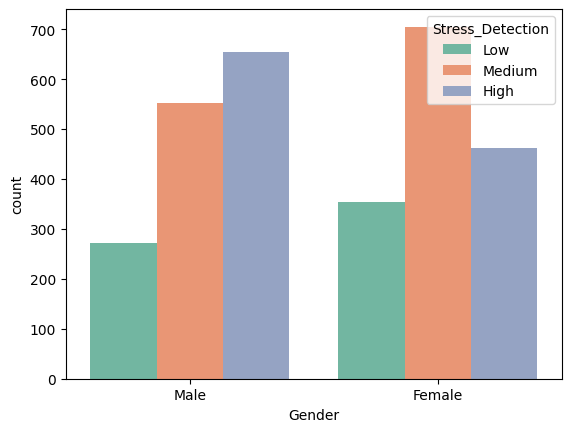

In [50]:
print(df['Gender'].value_counts())
sns.countplot(data=df,x=df['Gender'],hue=df['Stress_Detection'],palette = 'Set2')

In [51]:
print(f"total number of occupation : {df['Occupation'].nunique()}")
occupation_counts = df['Occupation'].value_counts().reset_index()
occupation_counts.columns = ['Occupation', 'Count']
print(occupation_counts.head())

total number of occupation : 169
     Occupation  Count
0       Teacher    140
1          Chef    108
2  Photographer     86
3         Nurse     86
4     Architect     74


In [52]:
fig_treemap = px.treemap(
    occupation_counts,
    path=[px.Constant("All Occupations"), 'Occupation'],
    values='Count',
    color='Count',
    color_continuous_scale='YlGnBu',
    hover_name='Occupation',
    hover_data={'Occupation': False, 'Count': True},
    title='Distribution of Occupations by Frequency'
)

fig_treemap.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    font=dict(family="Arial, sans-serif", size=12),
    title_font_size=22
)

# Mostrar la gráfica directamente
fig_treemap.show()

- A lot of categories - encoding it in One Hot Encoding format will lead to high dimensionality - I have solved engineered solution for this it later in the notebook

Marital_Status
Single      1372
Married     1364
Divorced     264
Name: count, dtype: int64


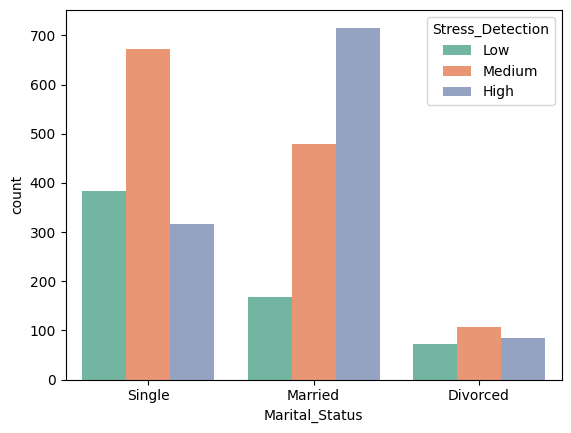

In [53]:
print(df['Marital_Status'].value_counts())
sns.countplot(data=df,x=df['Marital_Status'],hue=df['Stress_Detection'],palette = 'Set2')
plt.show()

Caffeine_Intake
2    1156
1    1074
3     667
0      94
4       9
Name: count, dtype: int64


<Axes: xlabel='Caffeine_Intake', ylabel='count'>

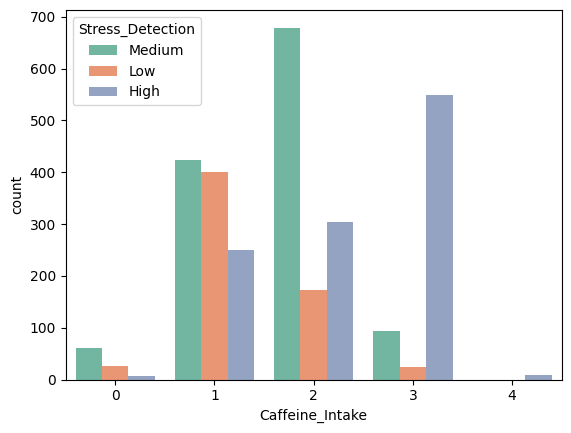

In [54]:
print(df['Caffeine_Intake'].value_counts())
sns.countplot(data=df,x=df['Caffeine_Intake'],hue=df['Stress_Detection'],palette = 'Set2')

Alcohol_Intake
1    1634
0     870
2     496
Name: count, dtype: int64


<Axes: xlabel='Alcohol_Intake', ylabel='count'>

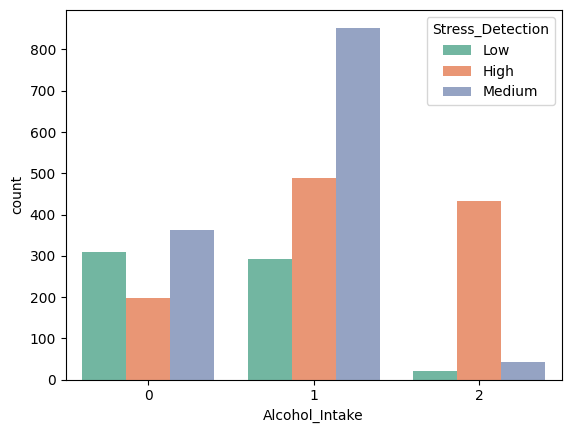

In [55]:
print(df['Alcohol_Intake'].value_counts())
sns.countplot(data=df,x=df['Alcohol_Intake'],hue=df['Stress_Detection'],palette = 'Set2')

Smoking_Habit
Yes    1601
No     1399
Name: count, dtype: int64


<Axes: xlabel='Smoking_Habit', ylabel='count'>

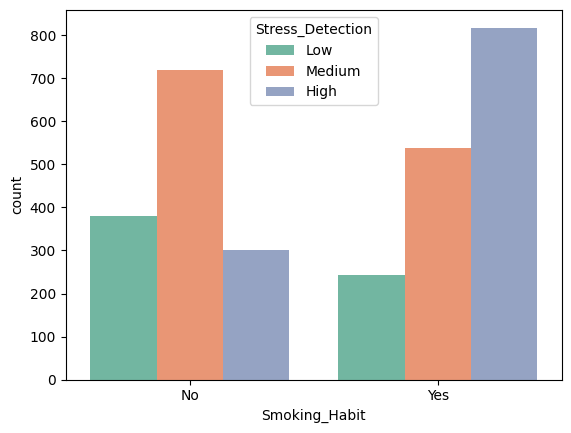

In [56]:
print(df['Smoking_Habit'].value_counts())
sns.countplot(data=df,x=df['Smoking_Habit'],hue=df['Stress_Detection'],palette = 'Set2')

Meditation_Practice
Yes    1837
No     1163
Name: count, dtype: int64


<Axes: xlabel='Meditation_Practice', ylabel='count'>

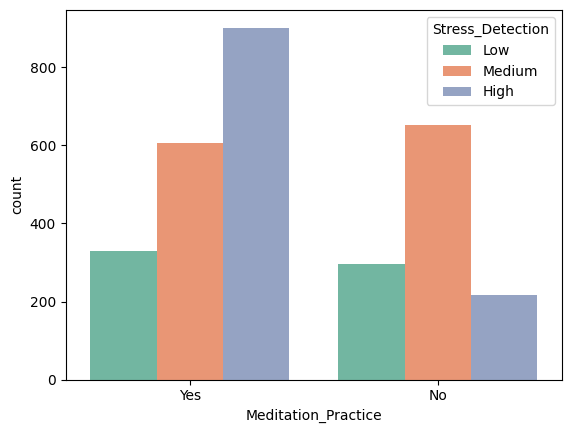

In [57]:
print(df['Meditation_Practice'].value_counts())
sns.countplot(data=df,x=df['Meditation_Practice'],hue=df['Stress_Detection'],palette = 'Set2')

Exercise_Type
Strength Training    979
Cardio               812
Yoga                 712
Pilates              357
Meditation           108
Aerobics              17
Walking               15
Name: count, dtype: int64


<Axes: xlabel='Exercise_Type', ylabel='count'>

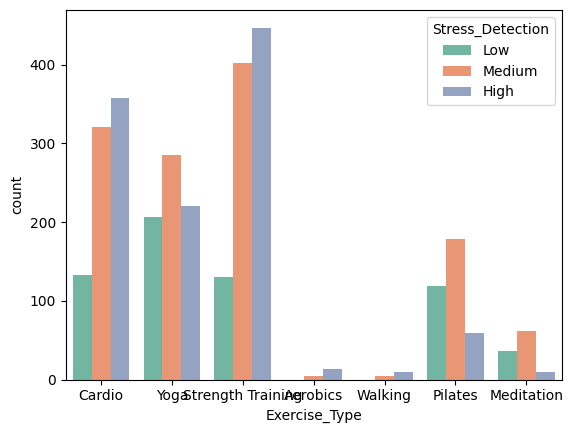

In [58]:
print(df['Exercise_Type'].value_counts())
sns.countplot(data=df,x=df['Exercise_Type'],hue=df['Stress_Detection'],palette = 'Set2')

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Feature Engineering</span> </center>


In [59]:
print("----------------------------------")
print(df['Wake_Up_Time'].value_counts())
print("----------------------------------")
print(df['Bed_Time'].value_counts())
print("----------------------------------")

----------------------------------
Wake_Up_Time
7:00 AM    726
8:00 AM    487
6:00 AM    473
6:30 AM    465
7:30 AM    286
5:30 AM    260
9:00 AM    185
5:00 AM     76
8:30 AM     28
4:30 AM     14
Name: count, dtype: int64
----------------------------------
Bed_Time
6:00 PM     571
11:00 PM    482
10:30 PM    478
5:00 PM     382
10:00 PM    323
7:00 PM     133
11:30 PM    130
9:30 PM     120
12:30 AM     84
9:00 PM      82
12:00 AM     57
6:30 PM      52
5:30 PM      33
8:30 PM      18
7:30 PM      18
1:00 AM      18
8:00 PM      10
4:00 PM       5
4:30 PM       4
Name: count, dtype: int64
----------------------------------


In [60]:
wake_up_dt = pd.to_datetime(df['Wake_Up_Time'], format='%I:%M %p')
bed_time_dt = pd.to_datetime(df['Bed_Time'], format='%I:%M %p')

time_difference = wake_up_dt - bed_time_dt

overnight_mask = time_difference < pd.Timedelta(0)
time_difference[overnight_mask] += pd.Timedelta(days=1)

df['sleep_hours'] = time_difference.dt.total_seconds() / 3600

df.drop(columns=['Wake_Up_Time', 'Bed_Time'], inplace=True)

- Engineered a new feature `sleep_hours` based on `Wake_Up_Time` and `Bed_Time`

In [61]:
df[['Sleep_Duration', 'sleep_hours']].head()

,Sleep_Duration,sleep_hours
0,7.0,9.0
1,6.0,7.0
2,7.0,9.0
3,7.0,9.0
4,8.0,8.0


#### the difference between the two columns (`Sleep_Hours` and `Sleep_Duration`) comes from:

- **Sleep Latency:** The time it takes to actually fall asleep after getting into bed.
- **Waking Up During the Night:** Brief periods of being awake (e.g., to use the restroom) that don't count as sleep.
- **Time Before Getting Up:** Waking up but staying in bed for a while before starting the day.

In [62]:
df['sleep_efficiency'] = (df['Sleep_Duration'] / df['sleep_hours']) * 10 # multiplied by 10 to keep the scale of sleep_efficiency and Sleep_Quality same

# In case of any data entry errors where duration > time in bed, cap efficiency at 100%
df.loc[df['sleep_efficiency'] > 100, 'sleep_efficiency'] = 100

- Engineered a new feature `sleep_efficiency` based on `sleep_hours` and `Sleep_Duration`

In [63]:
df[['sleep_efficiency', 'Sleep_Quality']].head()

,sleep_efficiency,Sleep_Quality
0,7.777778,4.0
1,8.571429,3.0
2,7.777778,4.0
3,7.777778,4.0
4,10.000000,5.0


### Feature Engineering: Sleep Efficiency Score

To deepen our understanding of sleep patterns, we are engineering a new feature called **`Sleep Efficiency`**. This is a powerful metric used in sleep science to objectively measure sleep quality.

#### What is Sleep Efficiency?

Sleep Efficiency represents the percentage of time a person spends asleep while they are in bed. It is calculated using the following formula:

$$\text{Sleep Efficiency} = \frac{\text{Sleep Duration}}{\text{Total Time in Bed (sleep\_hours)}} \times 100$$

A higher efficiency score indicates better, more consolidated sleep, while a lower score can suggest restlessness, insomnia, or other sleep disturbances—all of which are highly relevant to stress.



#### Sleep Efficiency vs. Sleep Quality

In our dataset, we now have two powerful but distinct metrics for sleep quality:

* **`Sleep Efficiency` (Objective):** This is a calculated, data-driven metric. It tells us the factual percentage of time spent asleep from the total time a person was in bed. It's a measure of *what actually happened*.
* **`Sleep_Quality` (Subjective):** This is a self-reported rating. It tells us how a person *felt* about their sleep. It's a measure of *perception*.

We expect these two features to be correlated, and our analysis confirms this. However, a correlation of less than 1.0 proves they each contribute unique information. A person can have high efficiency but feel their sleep was poor (unrefreshing sleep), or vice-versa.

By keeping both, we allow our model to capture a more complete picture of a person's well-being, combining the physical reality with the psychological perception to better predict stress levels.

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Handling `Occupation` feature - Reducing Dimensionality </span> </center>


In [64]:
# Define the mapping from generic category to a list of specific occupations
occupation_groups = {
    'Technology & IT': [
        'Software Engineer', 'Data Scientist', 'Software Developer', 'IT Manager',
        'Web Developer', 'Network Engineer', 'IT Consultant', 'SEO Specialist',
        'IT Specialist', 'Product Designer', 'Digital Marketer', 'Network Administrator',
        'Database Administrator', 'Software Architect', 'UX Designer', 'Data Engineer',
        'Software Tester', 'IT Support Specialist', 'Developer', 'IT Support', 'Technician',
        'Program Manager'
    ],
    'Healthcare & Medical': [
        'Doctor', 'Nurse', 'Physician', 'Nutritionist', 'Psychologist', 'Pharmacist',
        'Veterinarian', 'Physiotherapist', 'Dentist', 'Surgeon', 'Therapist',
        'Healthcare Assistant', 'Nurse Practitioner', 'Medical Assistant', 'Nutritional Specialist'
    ],
    'Business, Finance & Management': [
        'Marketing Manager', 'Business Owner', 'Business Consultant', 'Project Manager',
        'HR Specialist', 'Business Analyst', 'Product Manager', 'Operations Manager',
        'Accountant', 'HR Manager', 'Financial Analyst', 'Sales Manager', 'Manager',
        'Financial Advisor', 'Entrepreneur', 'Project Coordinator', 'Advertising Manager',
        'Brand Manager', 'Bank Manager', 'Account Manager', 'CEO', 'HR Executive',
        'Executive Director', 'Human Resources', 'Human Resources Manager', 'Marketing Director',
        'Financial Planner'
    ],
    'Creative, Arts & Media': [
        'Graphic Designer', 'Content Writer', 'Journalist', 'Interior Designer', 'Photographer',
        'Musician', 'Artist', 'Writer', 'Fashion Designer', 'Content Creator',
        'Copywriter', 'Content Strategist', 'Advertising Executive', 'Editor', 'Designer'
    ],
    'Sales & Customer Service': [
        'Sales Executive', 'Marketing Specialist', 'Sales Representative', 'Retail Manager',
        'Insurance Agent', 'Marketing Executive', 'Salesperson', 'Customer Support',
        'Retail Worker'
    ],
    'Skilled Trades & Labor': [
        'Civil Engineer', 'Construction Worker', 'Electrician', 'Plumber',
        'Construction Manager', 'Mechanical Engineer', 'Construction Engineer',
        'Electrical Engineer', 'Electrical Technician', 'Shopkeeper', 'Farmer', 'Tailor',
        'Carpenter', 'Weaver', 'Blacksmith', 'Fisherwoman', 'Potter', 'Seamstress',
        'Bakery Owner', 'Vegetable Vendor', 'Flower Seller', 'Mechanic', 'Handicrafts Maker',
        'Cobbler', 'Street Vendor', 'Factory Worker', 'Janitor', 'Painter', 'Cleaner',
        'Baker', 'Warehouse Worker'
    ],
    'Education & Research': [
        'Teacher', 'Research Assistant', 'Research Scientist', 'Scientist', 'Librarian',
        'Primary School Teacher', 'Researcher', 'Research Analyst', 'Physicist', 'Biologist',
        'Laboratory Technician'
    ],
    'Legal & Public Service': [
        'Lawyer', 'Civil Servant', 'Police Officer', 'Firefighter', 'Security Guard',
        'Social Worker', 'Security Officer'
    ],
    'Hospitality & Events': [
        'Chef', 'Event Planner', 'Bartender', 'Restaurant Manager', 'Waitress',
        'Event Manager', 'Event Coordinator'
    ],
    'Transportation & Logistics': [
        'Truck Driver', 'Driver', 'Taxi Driver', 'Pilot', 'Bus Driver', 'Delivery Driver',
        'Courier'
    ],
    'Personal Care & Fitness': [
        'Fitness Trainer', 'Hair Stylist', 'Personal Trainer', 'Nanny', 'Receptionist',
        'Fitness Instructor'
    ],
    'General/Other': [
        'Retired', 'Freelancer', 'Student', 'Actor', 'Banker', 'Secretary', 'Real Estate Agent'
    ]
}

In [65]:
occupation_to_group_map = {
    occupation: group for group, occupations in occupation_groups.items() for occupation in occupations
}

df['Occupation_Group'] = df['Occupation'].map(occupation_to_group_map)

# Fill any occupations that weren't in our list with 'Other'
df['Occupation_Group'].fillna('General/Other', inplace=True)

df = df.drop(columns=['Occupation'])

In [66]:
df['Occupation_Group'].head()

0                   Technology & IT
1    Business, Finance & Management
2                   Technology & IT
3                   Technology & IT
4              Education & Research
Name: Occupation_Group, dtype: object

- Reduced 169 categories of `Occupation` feature into 12 generic categories

In [68]:
group_counts = df['Occupation_Group'].value_counts().reset_index()
group_counts.columns = ['Occupation_Group', 'Count']

fig_bubble = px.scatter(
    group_counts,
    x='Occupation_Group',
    y='Count',
    size='Count',
    color='Occupation_Group',
    hover_name='Occupation_Group',
    size_max=70,
    title='Relative Size of Occupation Groups'
)

fig_bubble.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    yaxis=dict(showgrid=False, showticklabels=False, zeroline=False),
    plot_bgcolor='white',
    showlegend=True
)

# Mostrar la gráfica directamente
fig_bubble.show()

### 🎯 Dimensionality Reduction: Grouping the 'Occupation' Feature

In our dataset, the `Occupation` column is a **high-cardinality** feature, meaning it contains a large number of unique categories—169, to be exact.

#### The Challenge: The Curse of Dimensionality

If we were to directly apply **One-Hot Encoding (OHE)** to this feature, it would create 169 new binary columns in our dataset. This presents two major problems:

1.  **Increased Complexity:** The sheer number of new features would make our model significantly more complex and slower to train.
2.  **Risk of Overfitting:** Many of these occupations have very few data points, which can lead the model to learn from noise rather than true patterns, harming its ability to generalize to new data.

#### Our Solution: Strategic Grouping 💡

To address this, we've strategically grouped the 169 specific occupations into **12 broader, more meaningful categories** (e.g., 'Technology & IT', 'Healthcare & Medical', 'Skilled Trades & Labor', etc.).

The primary benefit of this approach is that it makes One-Hot Encoding feasible. Instead of creating 169 new features, we now only create 12. This dramatically reduces the dimensionality of our dataset, leading to a more efficient and robust model.

#### A Note on Class Imbalance ⚖️

We recognize that class imbalance exists in other features within this dataset, and we are proceeding with awareness of this.

While this grouping strategy *also* helps mitigate the imbalance within the `Occupation` feature by combining rare job titles into larger groups, our main motivation here was to solve the critical issue of **dimensionality**. This was a targeted decision to make a key feature manageable for our modeling process, directly improving our chances of building a generalizable and performant model.

In [69]:
cols_to_cap = [
    'Physical_Activity', 'Screen_Time', 'Travel_Time', 'Social_Interactions' # this features have few negative values which doesnt seem real so we are capping it to 0
]

for col in cols_to_cap:
    df.loc[df[col] < 0, col] = 0

print("Negative values in specified columns have been capped at 0.")

Negative values in specified columns have been capped at 0.


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Numerical Features EDA </span> </center>


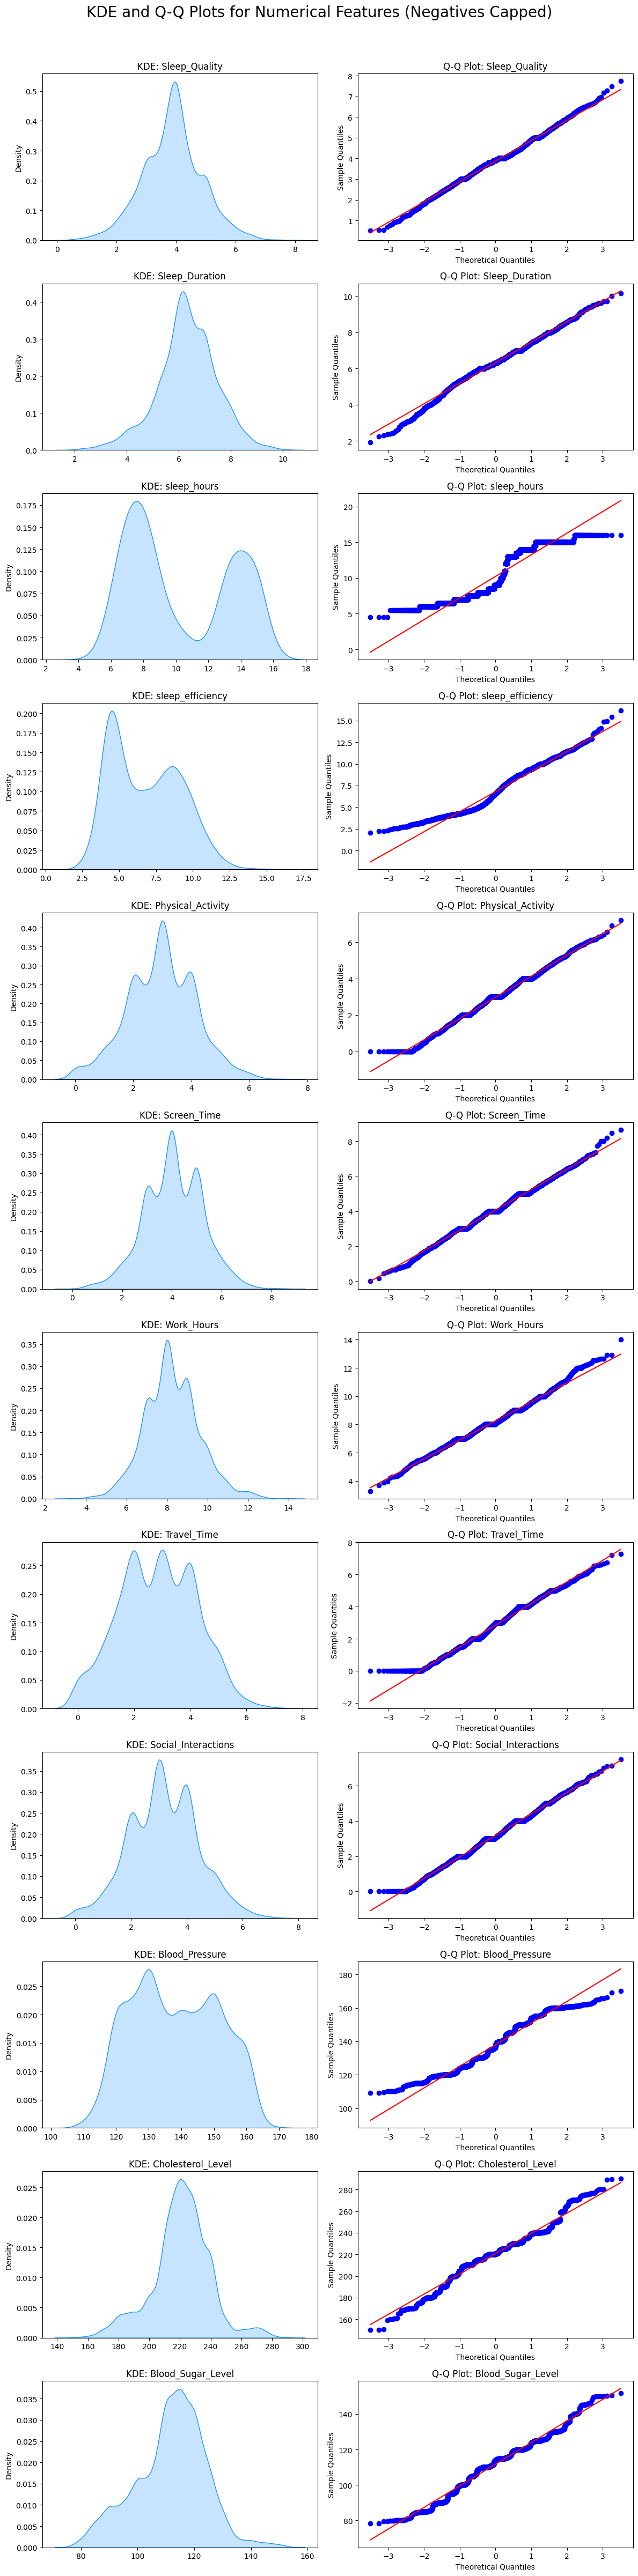

In [70]:
numerical_features = [
    'Sleep_Quality', 'Sleep_Duration', 'sleep_hours', 'sleep_efficiency',
    'Physical_Activity', 'Screen_Time', 'Work_Hours', 'Travel_Time',
    'Social_Interactions', 'Blood_Pressure', 'Cholesterol_Level', 'Blood_Sugar_Level'
]

# Create a figure and a set of subplots
fig, axes = plt.subplots(
    nrows=len(numerical_features),
    ncols=2,
    figsize=(12, 4 * len(numerical_features))
)

fig.suptitle('KDE and Q-Q Plots for Numerical Features (Negatives Capped)', fontsize=20, y=1.0)

for i, col in enumerate(numerical_features):
    # --- KDE Plot (Left) ---
    ax_kde = axes[i, 0]
    sns.kdeplot(data=df, x=col, fill=True, ax=ax_kde, color='dodgerblue')
    ax_kde.set_title(f'KDE: {col}', fontsize=12)
    ax_kde.set_xlabel('')
    ax_kde.set_ylabel('Density')

    # --- Q-Q Plot (Right) ---
    ax_qq = axes[i, 1]
    stats.probplot(df[col].dropna(), dist="norm", plot=ax_qq)
    ax_qq.set_title(f'Q-Q Plot: {col}', fontsize=12)
    ax_qq.set_xlabel('Theoretical Quantiles')
    ax_qq.set_ylabel('Sample Quantiles')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.99]) # rect leaves space for suptitle
plt.show()

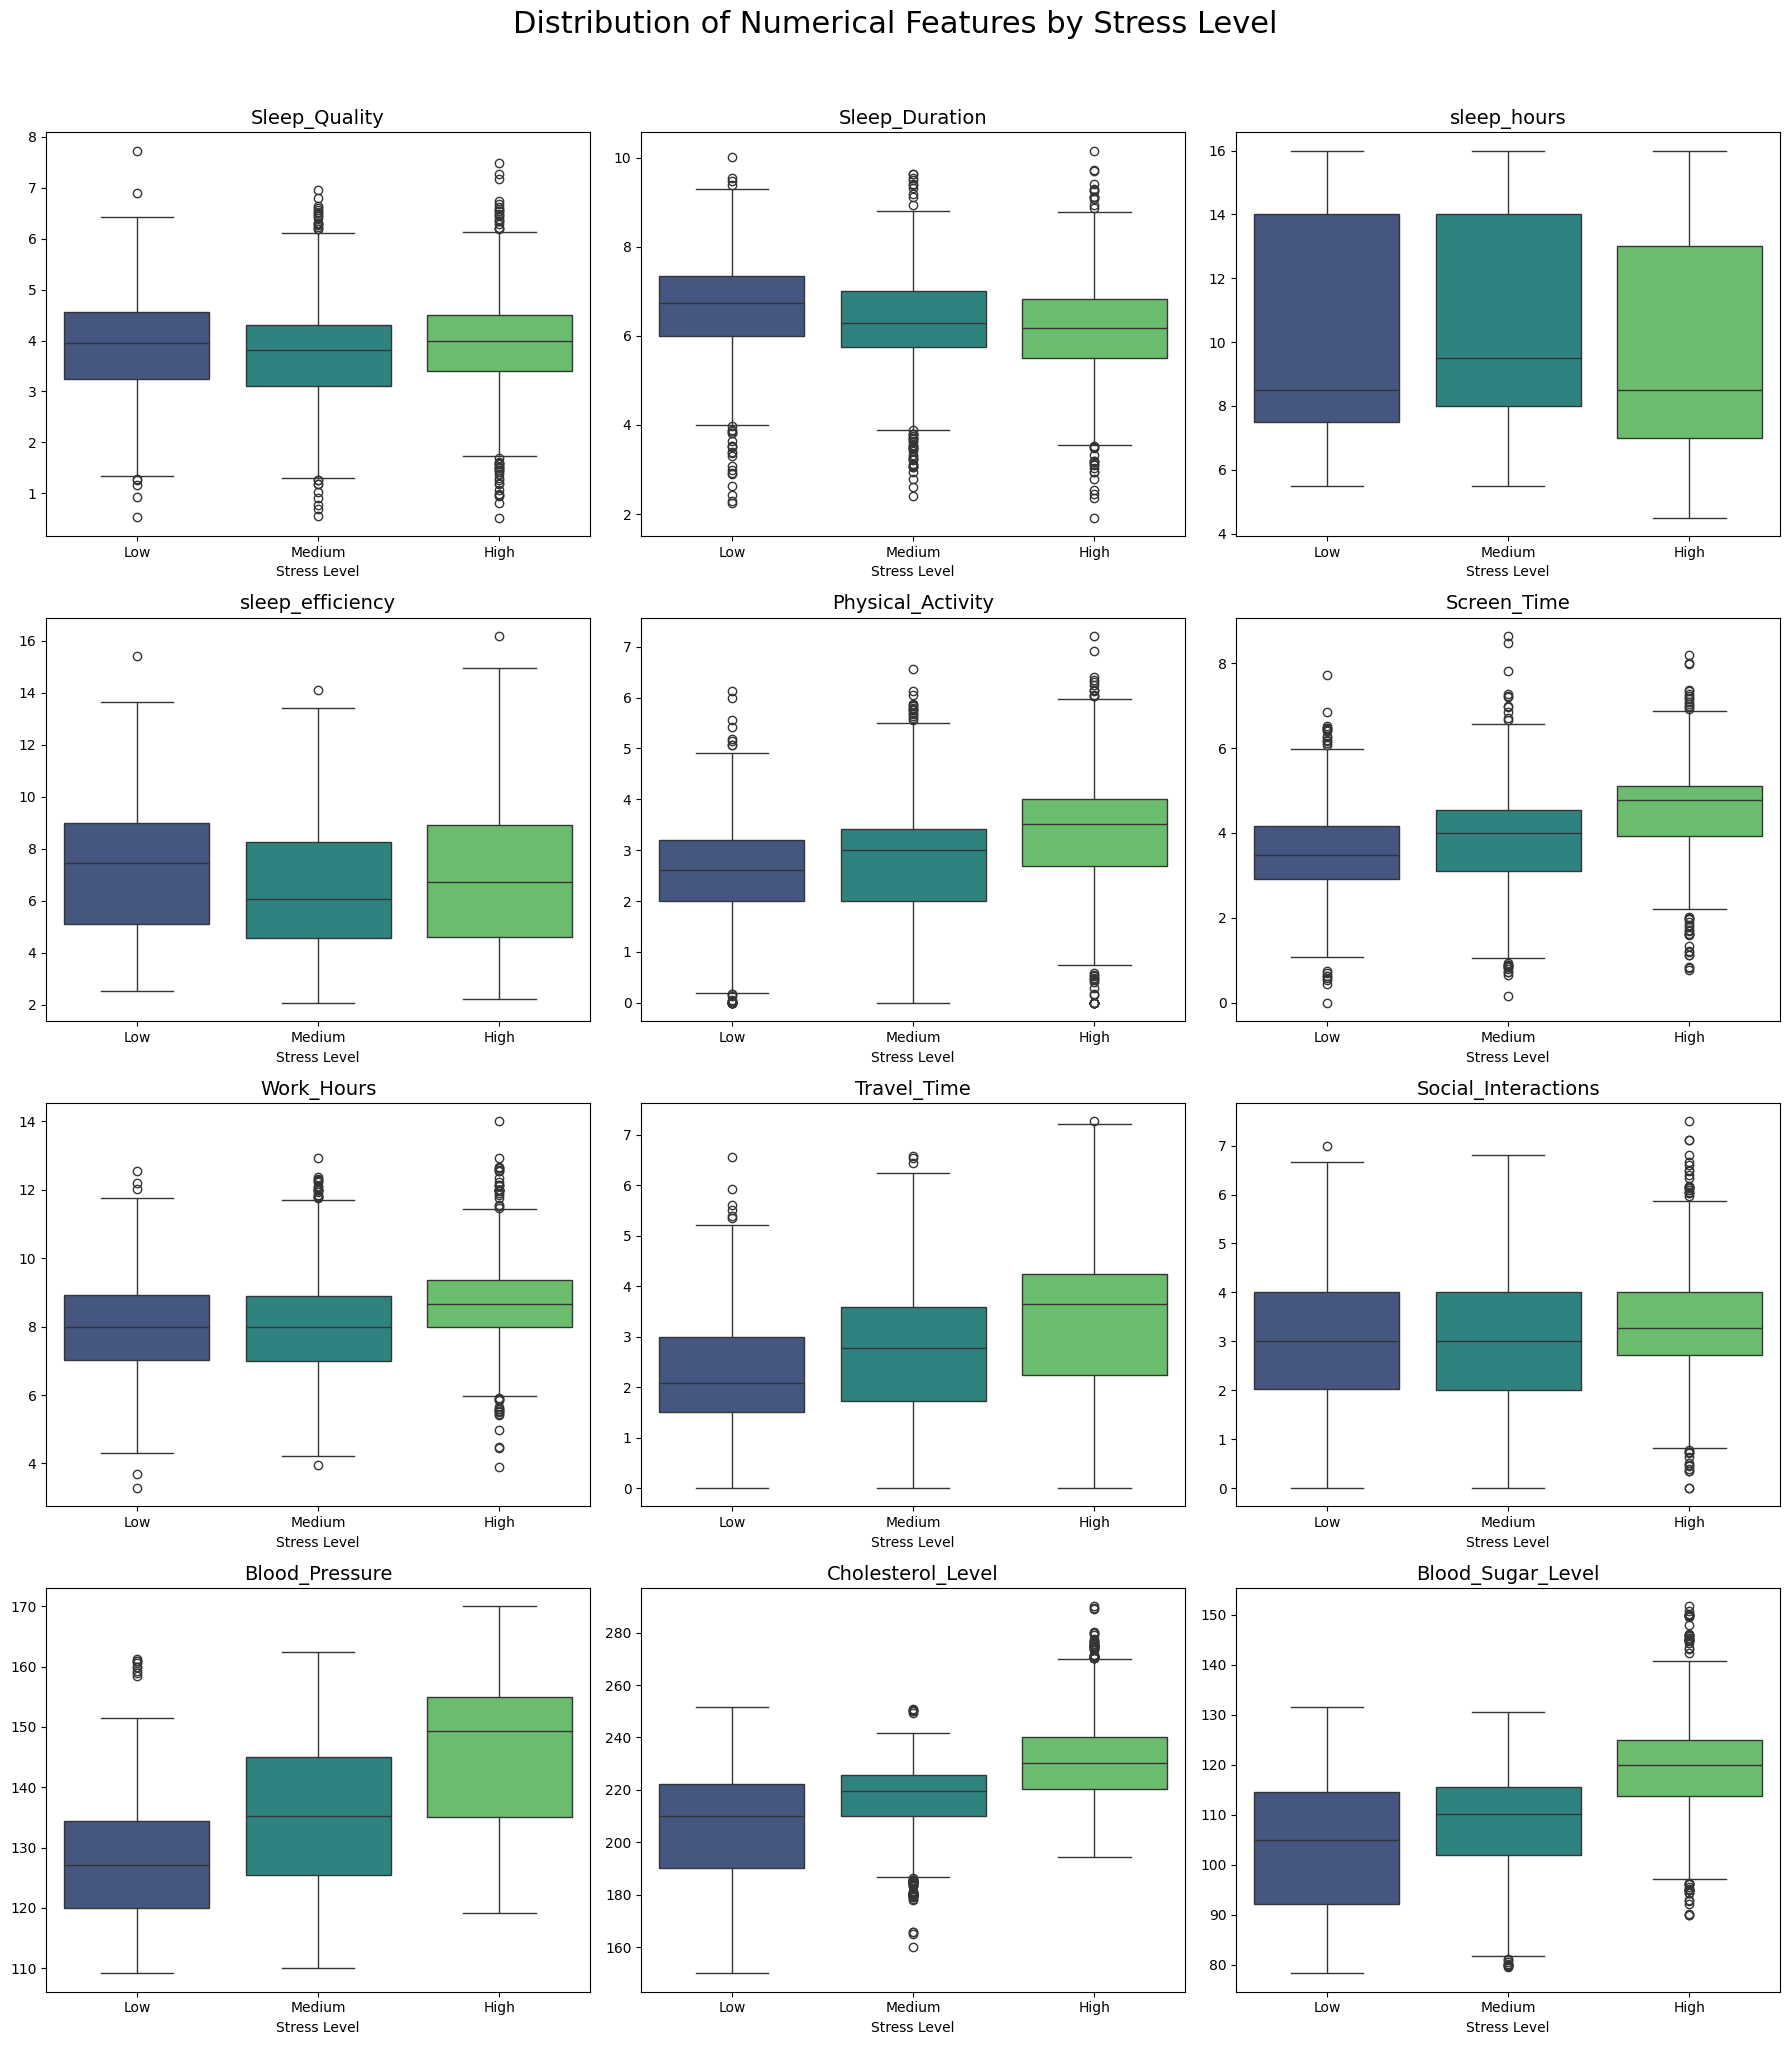

In [71]:
stress_order = ['Low', 'Medium', 'High']

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 20))

fig.suptitle('Distribution of Numerical Features by Stress Level', fontsize=22, y=1.02)

for i, feature in enumerate(numerical_features):
    # Calculate the row and column index for the subplot
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    sns.boxplot(
        data=df,
        x='Stress_Detection',
        y=feature,
        ax=ax,
        order=stress_order,
        palette='viridis'
    )

    ax.set_title(f'{feature}', fontsize=14)
    ax.set_xlabel('Stress Level', fontsize=10)
    ax.set_ylabel('')

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Encoding Features </span> </center>


In [72]:
boolean_map = {'No': 0, 'Yes': 1}
columns_to_encode = ['Smoking_Habit', 'Meditation_Practice']
for col in columns_to_encode:
    df[col] = df[col].map(boolean_map)
print(df[['Smoking_Habit', 'Meditation_Practice']].head())

   Smoking_Habit  Meditation_Practice
0              0                    1
1              0                    0
2              0                    1
3              0                    1
4              0                    1


In [73]:
target_mapping = {'Low': 0, 'Medium': 1,'High':2}
df['Stress_Detection'] = df['Stress_Detection'].map(target_mapping)
print(df['Stress_Detection'].head())

0    0
1    1
2    2
3    0
4    0
Name: Stress_Detection, dtype: int64


In [74]:
gender_mapping = {'Female': 0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
print(df['Gender'].head())

0    1
1    0
2    1
3    1
4    0
Name: Gender, dtype: int64


In [75]:
marital_encoding = {'Single': 0, 'Divorced': 1,'Married':2}
df['Marital_Status'] = df['Marital_Status'].map(marital_encoding)
print(df['Marital_Status'].head())

0    0
1    2
2    1
3    0
4    0
Name: Marital_Status, dtype: int64


In [76]:
from sklearn.preprocessing import LabelEncoder

exercise_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()

df['Exercise_Type'] = exercise_encoder.fit_transform(df['Exercise_Type'])
df['Occupation_Group'] = occupation_encoder.fit_transform(df['Occupation_Group'])

# Print label mappings for Exercise_Type
print("Exercise_Type label mapping:")
for label, code in zip(exercise_encoder.classes_, range(len(exercise_encoder.classes_))):
    print(f"{label} → {code}")

# Print label mappings for Occupation_Group
print("\nOccupation_Group label mapping:")
for label, code in zip(occupation_encoder.classes_, range(len(occupation_encoder.classes_))):
    print(f"{label} → {code}")

Exercise_Type label mapping:
Aerobics → 0
Cardio → 1
Meditation → 2
Pilates → 3
Strength Training → 4
Walking → 5
Yoga → 6

Occupation_Group label mapping:
Business, Finance & Management → 0
Creative, Arts & Media → 1
Education & Research → 2
General/Other → 3
Healthcare & Medical → 4
Hospitality & Events → 5
Legal & Public Service → 6
Personal Care & Fitness → 7
Sales & Customer Service → 8
Skilled Trades & Labor → 9
Technology & IT → 10
Transportation & Logistics → 11


In [77]:
df.head()

,Age,Gender,Marital_Status,Sleep_Duration,Sleep_Quality,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Smoking_Habit,...,Social_Interactions,Meditation_Practice,Exercise_Type,Blood_Pressure,Cholesterol_Level,Blood_Sugar_Level,Stress_Detection,sleep_hours,sleep_efficiency,Occupation_Group
0,30.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
1,35.0,0,2,6.0,3.0,1.0,3.0,0,1,0,...,3.0,0,6,110.0,160.0,80.0,1,7.0,8.571429,0
2,40.0,1,1,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,4,130.0,200.0,100.0,2,9.0,7.777778,10
3,35.0,1,0,7.0,4.0,2.0,4.0,1,0,0,...,5.0,1,1,120.0,180.0,90.0,0,9.0,7.777778,10
4,29.0,0,0,8.0,5.0,3.0,2.0,1,0,0,...,4.0,1,6,110.0,180.0,90.0,0,8.0,10.000000,2


# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Correlation Matrix & Analysis</span> </center>


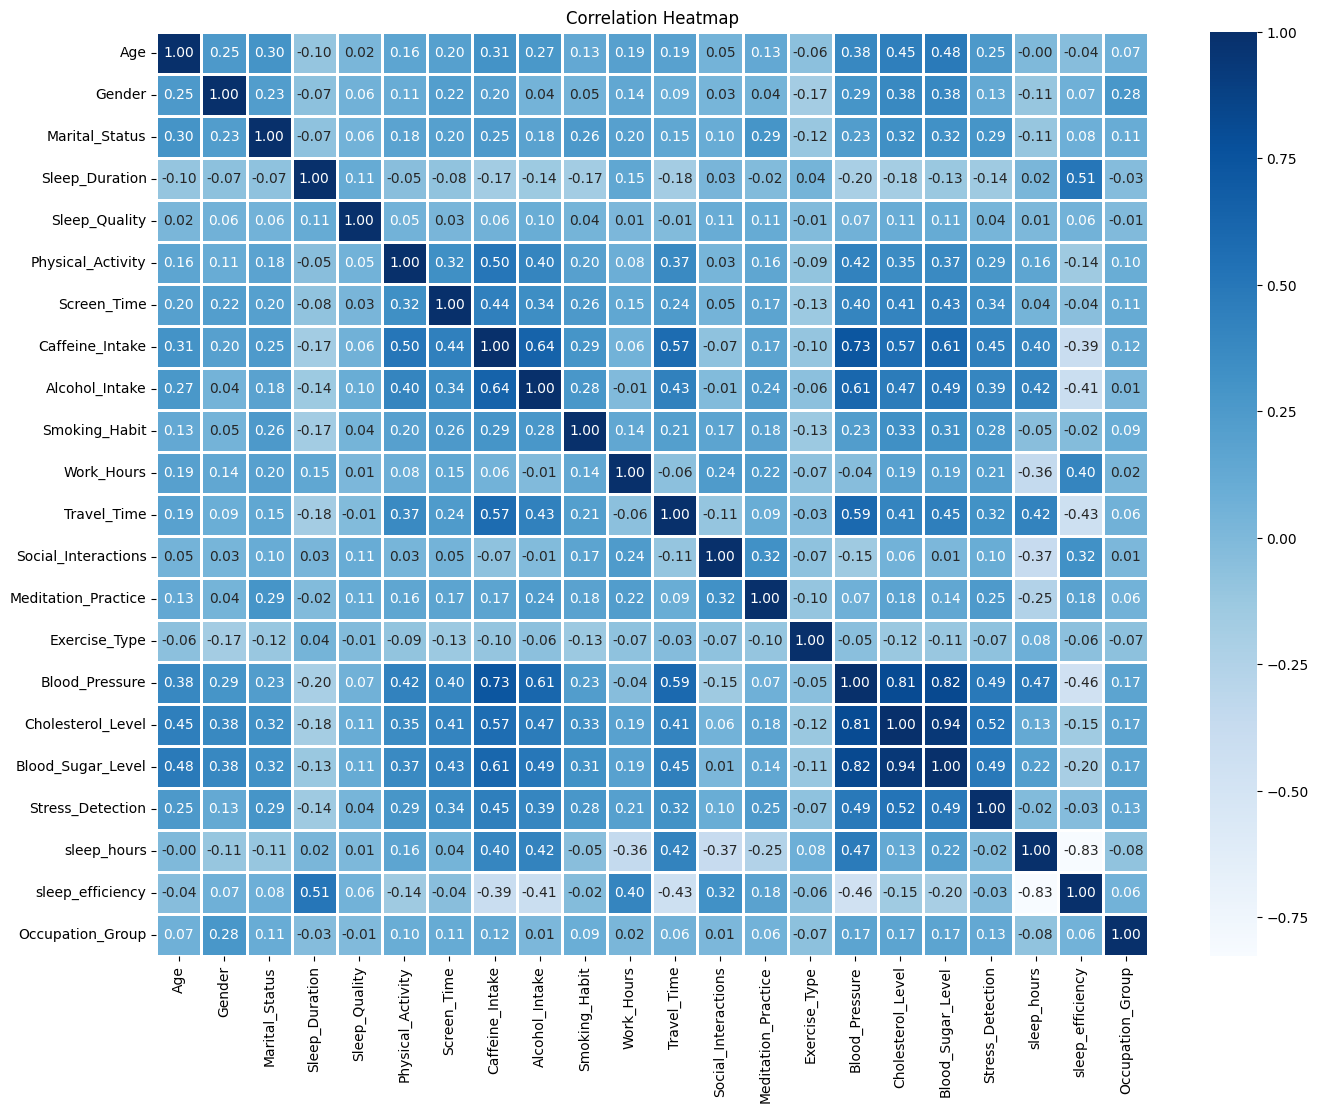

In [78]:
corr_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Train-Test Split</span> </center>


In [80]:
X = df.drop(columns=['Stress_Detection'])
y = df['Stress_Detection']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Modeling - RandomForestClassifier + GridSearchCV</span> </center>


In [83]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None,5,10,20],
    'min_samples_split': [None,1,2,3,5],
    'min_samples_leaf': [None,1,2,3,5],
}

grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best CV Score: 0.8845833333333333


In [84]:
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       117
           1       0.86      0.94      0.90       262
           2       0.92      0.93      0.93       221

    accuracy                           0.89       600
   macro avg       0.90      0.86      0.87       600
weighted avg       0.89      0.89      0.89       600



# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Confusion Matrix and Analysis</span> </center>


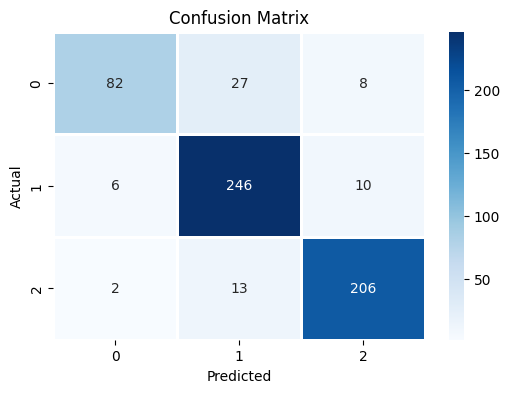

In [85]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=2)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Feature Importance</span> </center>


## <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">1. Using Random Forest inbuilt - feature_importances_</span>


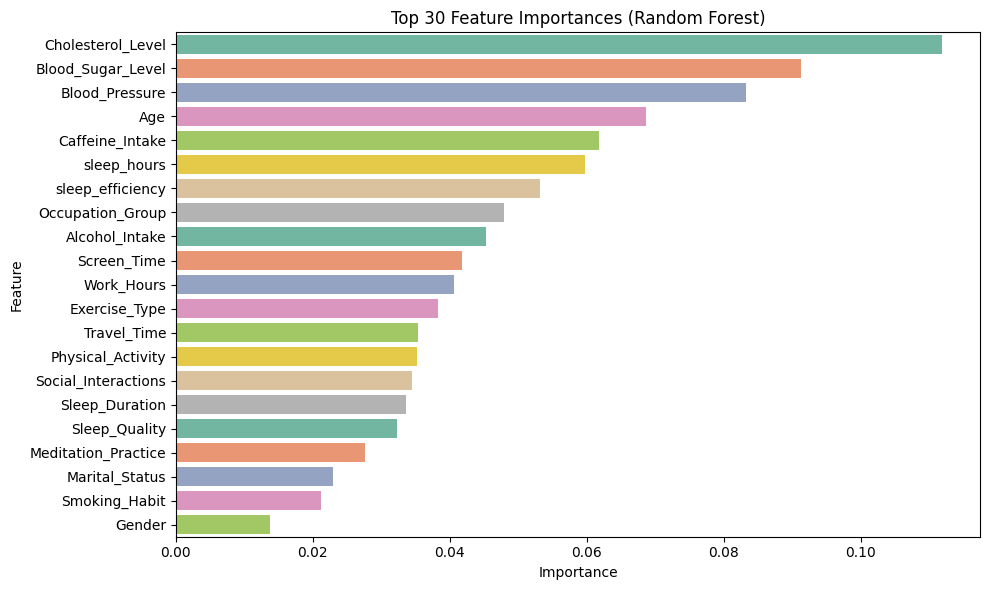

In [86]:
feature_names = X_train.columns

importances = grid_search.best_estimator_.feature_importances_

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(30), x='Importance', y='Feature', palette='Set2')
plt.title('Top 30 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

## <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">2. Using SHAPley</span>


In [91]:
!pip install shap

100%|===================| 1794/1800 [00:52<00:00]        

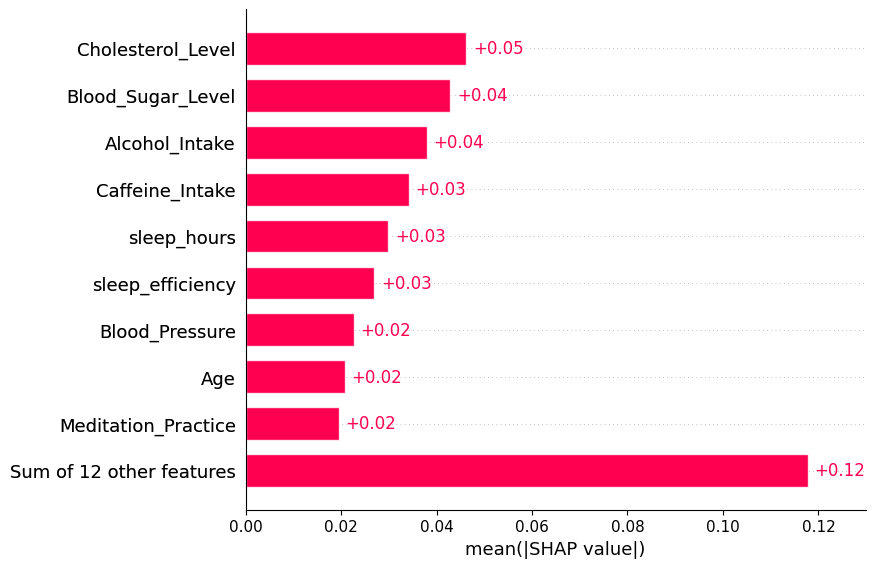

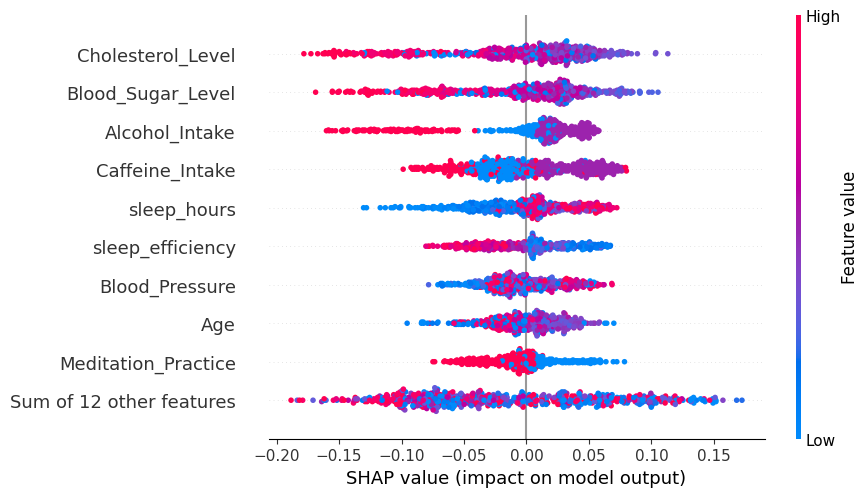

In [95]:
import shap

# API nueva: evita problemas de dimensionalidad
explainer = shap.Explainer(grid_search.best_estimator_, X_train)
shap_values = explainer(X_test)

# Para clasificación multiclase, selecciona clase "Medium" (índice 1)
shap.plots.bar(shap_values[:, :, 1])
shap.plots.beeswarm(shap_values[:, :, 1])

---
## Analysis: How Engineered Features Led to Success Despite Class Imbalance

Our final model demonstrated strong predictive performance, particularly in identifying "Medium" and "High" stress levels. This success is noteworthy because our target variable, `Stress_Detection`, was not perfectly balanced. The key to this achievement lies in the quality and power of our engineered features.



### 1. The Power of a Strong, Clear Signal 💡

The primary reason our model performed well is that our engineered features—specifically **`sleep_hours`** and **`sleep_efficiency`**—provided an exceptionally **strong and unambiguous signal**.

Class imbalance becomes a major problem when the model cannot find clear rules to distinguish between classes. However, as our SHAP analysis revealed, our features created very clear patterns:

* **Low `sleep_efficiency` consistently pointed towards High stress.**
* **High `sleep_hours` consistently pointed towards Low stress.**

Think of it like trying to find a specific landmark. If the landmark is a giant, brightly lit tower (a strong signal), you can find it easily even if the surrounding area is crowded and complex (the class imbalance). Our engineered features acted as that powerful signal, guiding the model directly to the correct conclusions, making the class imbalance less of an obstacle.

### 2. The Advantage of Our Random Forest Model 🌳

Our choice of a **Random Forest** model was also beneficial. Tree-based models work by finding the best feature splits that make the resulting groups as pure as possible.

Because features like `sleep_efficiency` provided such clean decision boundaries (e.g., a split at `efficiency < 75%` might effectively separate many "High" stress cases), the model could effectively isolate classes. Random Forest is inherently more robust to moderate class imbalance than some other algorithms, precisely because it can capitalize on these strong features to make decisive splits.

### 3. How Other Feature Engineering Helped ⚖️

It's also important to remember that our other major feature engineering step—**grouping the 169 `Occupation` categories into 12**—was a direct solution to an even more severe imbalance problem within that feature itself. By consolidating dozens of rare occupations with only a few data points into larger, more stable groups, we made the `Occupation_Group` feature much more reliable and prevented the model from learning noise. This added to the overall robustness of the model.

# <center> <span style="background: linear-gradient(90deg, #43a047, #009688); padding: 4px 12px; border-radius: 6px; color: white; font-size: 28px; font-weight: bold;">Conclusion</span></center>


In summary, the model's success was not accidental. It was the direct result of a targeted feature engineering strategy. By transforming ambiguous, subjective features (`Sleep_Quality`, `Sleep_Duration`) into powerful, objective metrics (`sleep_efficiency`, `sleep_hours`), we provided the model with clear signals that were strong enough to overcome the moderate imbalance in our target variable. This, combined with a suitable model choice, allowed us to build a highly effective and interpretable stress detection system.

<div style="text-align:center; font-weight:bold; font-size: 20px; background: linear-gradient(135deg, #66bb6a, #26a69a); padding:15px; border-radius:10px; color:#ffffff;">
  🤖 My model can now predict <strong>stress levels</strong> with high accuracy.<br><br>
  The only thing it <span style="color:#ffcccb;">can’t predict</span> is...<br><br>
  Why people read <span style="font-style:italic;">whole analysis</span><br>
  just to skip the <strong>0.2-second upvote 👍</strong>.<br><br>
</div>
